# Quasi-Newton
Example: $$\min -\sum_{1=1}^m\log(1-a_i^T x)-\sum_{i=1}^n\log\left(1-x_i^2\right)$$

In [4]:
import numpy as np
from newton import *

In [5]:
# m: number of constraints
# n: number of variables
m = 50
n = 200
A = np.random.randn(m, n)
b = np.ones(m)
# A = np.load('A.npy')
# b = np.load('b.npy')

f = lambda x: -np.sum(np.log(1 - A @ x)) - np.sum(np.log(1 - x**2))
grad_f = lambda x: A.T @ (1/(1 - A @ x)) + 2*x/(1 - x**2)
nabla_f = lambda x: A.T @ np.diag(1/(1 - A @ x)**2) @ A + np.diag(2/(1 - x**2)**2)
    
def dom_f(x, A=A, b=b):
    cons_1 = A @ x - b < 0
    cons_2 = np.abs(x) - 1 < 0
    return np.all(cons_1) and np.all(cons_2)

#fx = solve_by_cvx(A, b)


In [6]:
x_list_newton, obj_list_newton = newton(f, grad_f, nabla_f, np.zeros(n), A, b, dom_f, MAXITERS=50, TOL=1e-8, alpha=0.01, N=1, print_iter=False)

In [7]:
x_list_quasi, obj_list_quasi = quasi_newton(f, grad_f, np.zeros(n), A, b,dom_f, MAXITERS=1000, TOL=1e-8, alpha=0.01, print_iter=False, N=1, diag_only=False, decrement_func=None)

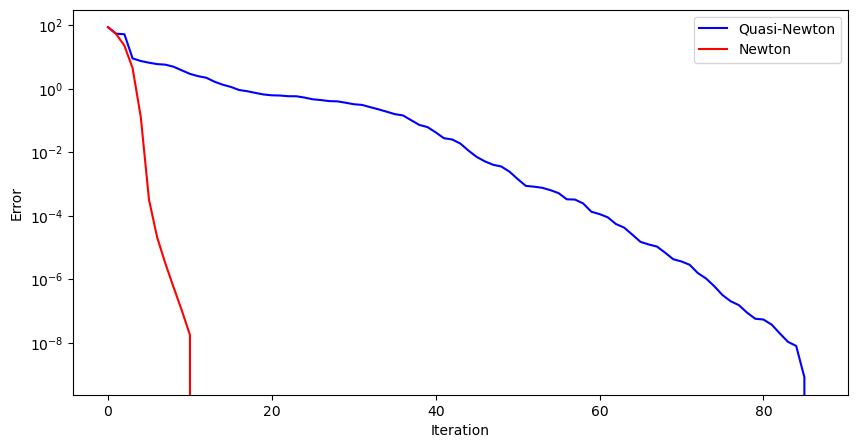

In [8]:
# Plot the error using the function plot_error_iter
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plot_error_iter(x_list_quasi, obj_list_quasi, obj_list_quasi[-1], label='Quasi-Newton', color='blue')
plot_error_iter(x_list_newton, obj_list_newton, obj_list_newton[-1], label='Newton', color='red')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.yscale('log')
plt.show()